In [1]:
%matplotlib notebook

In [2]:
import xemc3
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
sys.path.append('/u/phg/adas')
from importlib import reload
import atomdat.adas.ibal_phg as ibal; reload(ibal)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, pyplot as plt

In [3]:
import xemc3
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm, ticker
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as colors
import xarray as xr
import numpy as np
import ipywidgets as widgets
import mpl_interactions.ipyplot as iplt
from pathlib import Path
from brokenaxes import brokenaxes

philip_folder =  "/u/phg/adas/atomdatpy/NetCDFs-new"
experiment_folder = "N03.00_P05.00_D05_R02.00-C"
plotfolder = "./plots"

dsdir = Path("../atomdatpy/NetCDFs-new/")
paths = (sorted(dsdir.glob("N03.00_P05.00_D02_R0*"), reverse=True))[:]
cpaths = paths[:5]
diff_paths = [paths[-3], paths[-1], paths[-2]]
all_paths = [*cpaths[:-1], *diff_paths]
interesting_paths = [cpaths[0], cpaths[2], cpaths[4], *diff_paths]

In [4]:
def get_color(f, d):
    d2 = np.sqrt((10*d-2)/8)
    r = cm.magma( (f-0.4)*1.8 )
    s = tuple((1-d2)*rr + d2*0.6 for rr in r)
    #print(f,d,d2,r,s)
    return s

In [5]:
def get_plot_lz(te=np.logspace(np.log10(2.01e-1),np.log10(1.49e4),300), **kwargs):
    _,_,lz,_ = ibal.calc_fz('c', te=te, **kwargs)
    *lz, lges = lz.T
    return lz, lges

In [6]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

trunc_binary = truncate_colormap(mpl.cm.binary, 0, 1)

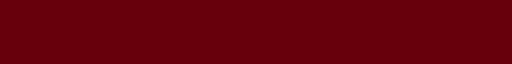

In [7]:
truncate_colormap(cm.Reds, 1, 1)

# plot against Te

<IPython.core.display.Javascript object>


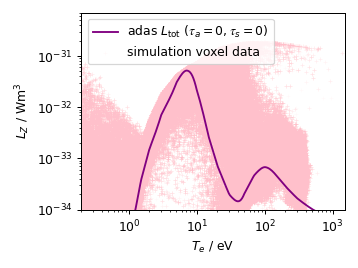

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


In [8]:
plt.close("all")
fig, ax = plt.subplots(figsize=(4,3))

# plot approximation
te = np.logspace(np.log10(2.01e-1),np.log10(1.49e4),300)
lz1, lztot1 = get_plot_lz(ne=1e20)
ax.plot(te, lztot1, c="purple", label="adas $L_{\mathrm{tot}}$ ($𝜏_a=0, 𝜏_s=0$)", linestyle="-", zorder=3)

# plot emc3 data
ds = xr.open_dataset(all_paths[0])
ds_lz = ds.Lz.data.flatten()
ds_te = ds.Te.data.flatten()
ax.scatter(ds_te, ds_lz, s=10, marker="+", lw=0.5, c="pink", label="simulation voxel data", zorder=2,
          alpha=.1)

    
ax.set_xlabel("$T_e$ / eV")
ax.set_ylabel("$L_Z$ / Wm$^3$")
ax.set_yscale("log"); ax.set_xscale("log")
ax.set_xlim(0.2,1500); ax.set_ylim(1e-34, 7e-31)
ax.legend().set_zorder(4)
fig.tight_layout()
#fig.savefig("./plots/lzCRMcurve.png", dpi=200)
#fig.savefig("./plots/lzCRMcurve.pdf", dpi=200)


gogo


<IPython.core.display.Javascript object>


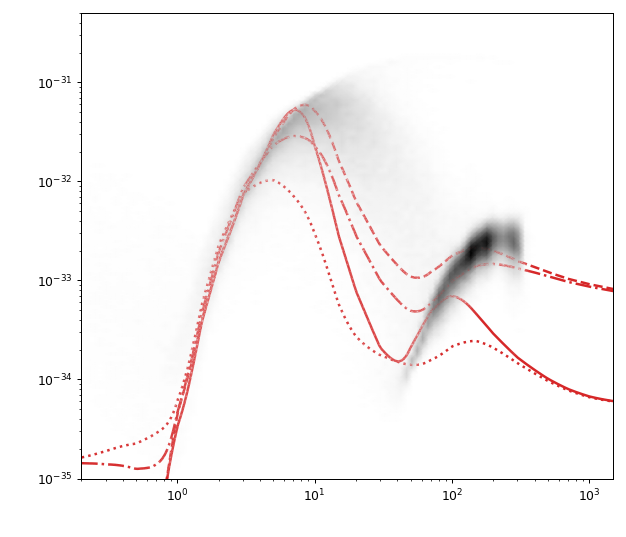

In [9]:
print("gogo")
xlims, ylims = (0.2, 1.5e3), (1e-35, 5e-31)
norm = colors.PowerNorm(gamma=1, vmin=0, vmax=1) 
# colors.LogNorm(vmin=1e-3, vmax=1)# colors.SymLogNorm(vmin=0, vmax=1, linthresh=1e-3)
cmap = trunc_binary
fig, ax = plt.subplots(figsize=(4+3,3+3))

# plot approximation
te = np.logspace(np.log10(2.01e-1),np.log10(1.49e4),300)
lz1, lztot1 = get_plot_lz(ne=1e20)
ax.plot(te, lztot1, c="C3", label="adas $L_{\mathrm{tot}}$ ($𝜏_a=0, 𝜏_s=0$)", linestyle="-", zorder=2, lw=2)

# plot emc3 data
ds = xr.open_dataset(all_paths[-1])
ds_lz = ds.Lz.data.flatten()
ds_te = ds.Te.data.flatten()
xy_edges = [np.logspace(*np.log10(xlims), 100), np.logspace(*np.log10(ylims), 100)]
xy_grid = np.array(np.meshgrid(*xy_edges, indexing="ij"))
mid_xy_grid = (xy_grid[:,1:,1:] + xy_grid[:,:-1,1:] + xy_grid[:,:-1,:-1] + xy_grid[:,1:,:-1])/4

z_values, _, _ = np.histogram2d(x=ds_te, y=ds_lz, bins=xy_edges)
normalized_z_values = z_values/z_values.max() + 1e-100
cb = ax.pcolormesh(*xy_grid, normalized_z_values, norm=norm, cmap=cmap)
# cb = ax.contour(*mid_xy_grid, z_values, locator=ticker.LogLocator(),
#             levels=[5e1,2e2,1e3,5e3,2e4,1e5], cmap=cm.cool_r, zorder=3)
    
#fig.colorbar(cb, label="normalized density")# , extend="min")
    
    
    
ax.set_xlabel("$T_e$ / eV")
ax.set_ylabel("$L_Z$ / Wm$^3$")
ax.set_yscale("log"); ax.set_xscale("log")
ax.set_xlim(xlims); ax.set_ylim(ylims)
ax.legend().set_zorder(1000)
fig.tight_layout()
#fig.savefig("./plots/lzCRMcurve.png", dpi=200)
#fig.savefig("./plots/lzCRMcurve.pdf", dpi=200)

In [10]:
ax.clear()
ax.pcolormesh(*mid_xy_grid, normalized_z_values, norm=norm, cmap=cmap, shading="gouraud")
ax.set_xlim(xlims); ax.set_ylim(ylims)
ax.set_yscale("log"); ax.set_xscale("log")

In [11]:
te = np.logspace(np.log10(2.01e-1),np.log10(1.49e4),300)
lz1, lztot1 = get_plot_lz(ne=3e19)
ax.plot(te, lztot1, c="C3", label="adas $L_{\mathrm{tot}}$ ($𝜏_a=0, 𝜏_s=0$)", 
        alpha=1, linestyle="-", zorder=2, lw=2)

lz1, lztot1 = get_plot_lz(ne=3e19, taua=0.005)
ax.plot(te, lztot1, c="C3", label="adas $L_{\mathrm{tot}}$ ($𝜏_a=0.01, 𝜏_s=0$)", 
        alpha=1, linestyle="--", zorder=2, lw=2)

lz1, lztot1 = get_plot_lz(ne=3e19, taus=0.005)
ax.plot(te, lztot1, c="C3", label="adas $L_{\mathrm{tot}}$ ($𝜏_a=0, 𝜏_s=0.0025$)", 
        alpha=1, linestyle=":", zorder=2, lw=2)

lz1, lztot1 = get_plot_lz(ne=3e19, taus=0.005, taua=0.005)
ax.plot(te, lztot1, c="C3", label="adas $L_{\mathrm{tot}}$ ($𝜏_a=0, 𝜏_s=0.0025$)", 
        alpha=1, linestyle="-.", zorder=2, lw=2)

ax.pcolormesh(*mid_xy_grid, normalized_z_values, norm=norm, cmap=cmap, shading="gouraud", 
              alpha=normalized_z_values**(1/2), zorder=3)

gogo


<IPython.core.display.Javascript object>


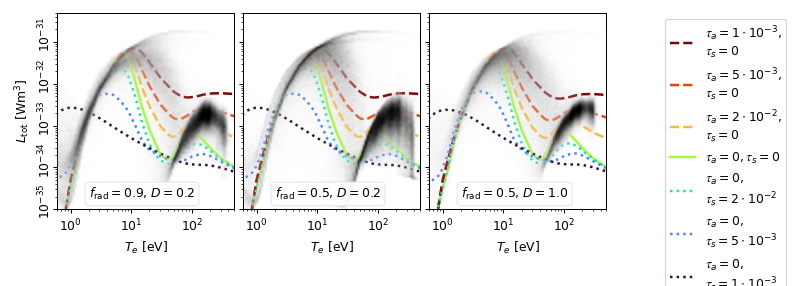

<xarray.DataArray 'ne' ()>
array(2.05136536e+19) <xarray.DataArray 'ne' ()>
array(2.2465e+19)
<xarray.DataArray 'ne' ()>
array(2.0570042e+19) <xarray.DataArray 'ne' ()>
array(2.4242e+19)
<xarray.DataArray 'ne' ()>
array(2.23113591e+19) <xarray.DataArray 'ne' ()>
array(2.6916e+19)


In [18]:
print("gogo")
xlims, ylims = (0.6, 5e2), (1e-35, 5e-31)
norm = colors.PowerNorm(gamma=1, vmin=0, vmax=1) 
# colors.LogNorm(vmin=1e-3, vmax=1)# colors.SymLogNorm(vmin=0, vmax=1, linthresh=1e-3)
cmap = trunc_binary
linecm = mpl.cm.turbo
fig, axs = plt.subplots(figsize=(9,3.2), ncols=4)

for i, cpath in enumerate([all_paths[0], all_paths[4], all_paths[-1]]):
    frad = float(cpath.stem[20:24])/float(cpath.stem[9:13])
    diffval = float(2 if cpath.stem[-1]=="C" else cpath.stem[-2:])/10
    pathlabel="$f_{\mathrm{rad}} =$" + str(frad) + ", $D=$" + str(diffval)

    # plot emc3 data
    ds = xr.open_dataset(cpath)
    ds_lz = ds.Lz.data.flatten()
    ds_te = ds.Te.data.flatten()
    xy_edges = [np.logspace(*np.log10(xlims), 100), np.logspace(*np.log10(ylims), 100)]
    xy_grid = np.array(np.meshgrid(*xy_edges, indexing="ij"))
    mid_xy_grid = (xy_grid[:,1:,1:] + xy_grid[:,:-1,1:] + xy_grid[:,:-1,:-1] + xy_grid[:,1:,:-1])/4

    z_values, _, _ = np.histogram2d(x=ds_te, y=ds_lz, bins=xy_edges)
    normalized_z_values = z_values/z_values.max() + 1e-100
    param = 1.5
    normalized_z_plot_values = (param*normalized_z_values - normalized_z_values**param)/(param-1)
    axs[i].pcolormesh(*mid_xy_grid, normalized_z_plot_values, norm=norm, cmap=cmap, shading="gouraud", alpha=1, zorder=1.5)
    axs[i].pcolormesh(*mid_xy_grid, normalized_z_plot_values, norm=norm, cmap=cmap, shading="gouraud", alpha=normalized_z_plot_values, zorder=3)
    
    
    # plot approximation
    mean_ne = float(ds.ne.mean().data[()]); print(ds.ne.mean(), ds.ne.median())
    te = np.logspace(np.log10(2.01e-1),np.log10(1.49e4),300)
    
    _, lztot1 = get_plot_lz(ne=mean_ne)
    axs[i].plot(te, lztot1, c=linecm(0.5), linestyle="-", zorder=2, lw=2)
    _, lztot1 = get_plot_lz(ne=mean_ne, taua=2e-2)
    axs[i].plot(te, lztot1, c=linecm(0.6666), linestyle="--", zorder=2, lw=2)
    _, lztot1 = get_plot_lz(ne=mean_ne, taua=5e-3)
    axs[i].plot(te, lztot1, c=linecm(0.8333), linestyle="--", zorder=2, lw=2)
    _, lztot1 = get_plot_lz(ne=mean_ne, taua=1e-3)
    axs[i].plot(te, lztot1, c=linecm(0.9999), linestyle="--", zorder=2, lw=2)
    _, lztot1 = get_plot_lz(ne=mean_ne, taus=2e-2)
    axs[i].plot(te, lztot1, c=linecm(0.3333), linestyle=":", zorder=2, lw=2)
    _, lztot1 = get_plot_lz(ne=mean_ne, taus=5e-3)
    axs[i].plot(te, lztot1, c=linecm(0.1666), linestyle=":", zorder=2, lw=2)
    _, lztot1 = get_plot_lz(ne=mean_ne, taus=1e-3)
    axs[i].plot(te, lztot1, c=linecm(0.0), linestyle=":", zorder=2, lw=2)
    if i==0:
        axs[-1].plot(te, lztot1, c=linecm(0.9999), label="$𝜏_a=1\cdot 10^{-3},"+"$\n$"+"𝜏_s=0$", linestyle="--", zorder=2, lw=2)
        axs[-1].plot(te, lztot1, c=linecm(0.8333), label="$𝜏_a=5\cdot 10^{-3},"+"$\n$"+"𝜏_s=0$", linestyle="--", zorder=2, lw=2)
        axs[-1].plot(te, lztot1, c=linecm(0.6666), label="$𝜏_a=2\cdot 10^{-2},"+"$\n$"+"𝜏_s=0$", linestyle="--", zorder=2, lw=2)
        axs[-1].plot(te, lztot1, c=linecm(0.5), label="$𝜏_a=0, 𝜏_s=0$", linestyle="-", zorder=2, lw=2)
        axs[-1].plot(te, lztot1, c=linecm(0.3333), label="$𝜏_a=0,"+"$\n$"+"𝜏_s=2\cdot 10^{-2}$", linestyle=":", zorder=2, lw=2)
        axs[-1].plot(te, lztot1, c=linecm(0.1666), label="$𝜏_a=0,"+"$\n$"+"𝜏_s=5\cdot 10^{-3}$", linestyle=":", zorder=2, lw=2)
        axs[-1].plot(te, lztot1, c=linecm(0.0), label="$𝜏_a=0,"+"$\n$"+"𝜏_s=1\cdot 10^{-3}$", linestyle=":", zorder=2, lw=2)
    
    
    # labels
    axs[i].set_xlabel("$T_e$ [eV]")
    if i==0: axs[i].set_ylabel("$L_{\mathrm{tot}}$ [Wm$^3$]", rotation=90)
    axs[i].set_yscale("log"); axs[i].set_xscale("log")
    axs[i].set_xlim(xlims); axs[i].set_ylim(ylims)
    bbox_props = dict(boxstyle="round", fc="w", ec="0.9", alpha=0.9)
    axs[i].text(2, 1.5e-35, pathlabel, ha="left", va="bottom", bbox=bbox_props)
    #axs[i].legend().set_zorder(1000)
    
    
# last plot
for i in range(1,4):
    axs[i].axes.yaxis.set_ticklabels([])
axs[-1].axes.xaxis.set_ticklabels([])
axs[-1].set_xlim((0.5,1))
axs[-1].set_ylim((0.5,1))
axs[-1].axes.xaxis.set_visible(False)
axs[-1].axes.yaxis.set_visible(False)
axs[-1].axis('off')
axs[-1].legend()

axs[0].tick_params(axis='y', labelrotation = 90)
dx = 4/72 #to adjust if necessary
dy = 15/72 #to adjust if necessary
offset = mpl.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
# apply offset transform to all y ticklabels (minor and major)
for label in axs[0].yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
fig.tight_layout()
fig.subplots_adjust(wspace=0.05, hspace=0)
fig.savefig("./plots/lzCRMcurve.png", dpi=300)
fig.savefig("./plots/lzCRMcurve.pdf", dpi=200)

# calculate radiated power for the different tau cases 

In [19]:
cpath = all_paths[-1]
ds = xr.open_dataset(cpath)
# grid volumes
gv = np.load("../radiation Ez analysis/data/volumes.npy")
te=np.logspace(np.log10(2.01e-1),np.log10(1.49e4),300)
lz1, lztot = get_plot_lz(te=te, ne=float(ds.ne.mean()),taua=2e-3)
nztot = ds.nZ1+ds.nZ2+ds.nZ3+ds.nZ4+ds.nZ5+ds.nZ6

In [20]:
# map calculated crm lz values onto each cell to calculate the CRM power with
# assume constant mean electron density for interpolation, but use correct value for P=n_e n_imp L_tot V calculation
# te -> lz
# total density = nz1+nz2+...+neutral_impurity_0
crm_lztot = np.interp(ds.Te, te, lztot)
crm_eztot = crm_lztot * ds.ne * nztot
crm_p = (gv*crm_eztot).sum()

emc3_p = (gv * ds.Ez.sum(dim="Ionization")).sum()


crm_p, emc3_p

(<xarray.DataArray ()>
 array(258362.79180161),
 <xarray.DataArray 'Ez' ()>
 array(236396.45053055))

# emc ionization stages

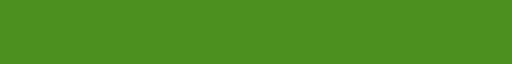

In [21]:
truncate_colormap(cm.PiYG, 0.9, 0.9)

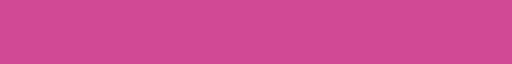

In [22]:
truncate_colormap(cm.PiYG, 0.15, 0.15)

gogo


<IPython.core.display.Javascript object>


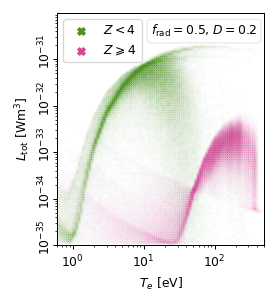

In [24]:
print("gogo")
xlims, ylims = (0.6, 5e2), (1e-35, 0.99e-30)
norm = colors.PowerNorm(gamma=1, vmin=0, vmax=1) 
# colors.LogNorm(vmin=1e-3, vmax=1)# colors.SymLogNorm(vmin=0, vmax=1, linthresh=1e-3)
linecm = mpl.cm.turbo
fig, ax = plt.subplots(figsize=(3.1,3.4))
axs=[ax]

for i, cpath in enumerate([all_paths[4]]):
    frad = float(cpath.stem[20:24])/float(cpath.stem[9:13])
    diffval = float(2 if cpath.stem[-1]=="C" else cpath.stem[-2:])/10
    pathlabel="$f_{\mathrm{rad}} =$" + str(frad) + ", $D=$" + str(diffval)

    # plot emc3 data
    ds = xr.open_dataset(cpath)
    ds_lz = ds.Lz.data.flatten()
    # scale py fraction made by >4
    ez_rescale_low = (ds.Ez[:4].sum(dim="Ionization")/ds.Ez.sum(dim="Ionization")).data.flatten()
    ez_rescale_high = (ds.Ez[4:].sum(dim="Ionization")/ds.Ez.sum(dim="Ionization")).data.flatten()
    ds_te = ds.Te.data.flatten()
    xy_edges = [np.logspace(*np.log10(xlims), 100), np.logspace(*np.log10(ylims), 100)]
    xy_grid = np.array(np.meshgrid(*xy_edges, indexing="ij"))
    mid_xy_grid = (xy_grid[:,1:,1:] + xy_grid[:,:-1,1:] + xy_grid[:,:-1,:-1] + xy_grid[:,1:,:-1])/4

    z_values, _, _ = np.histogram2d(x=ds_te, y=ez_rescale_low*ds_lz, bins=xy_edges)
    normalized_z_values = z_values/z_values.max() + 1e-100
    axs[i].pcolormesh(*mid_xy_grid, normalized_z_values, norm=norm, cmap=truncate_colormap(cm.PiYG, 0.9, 0.9),
                      shading="gouraud", alpha=normalized_z_values, zorder=1.5)
    z_values, _, _ = np.histogram2d(x=ds_te, y=ez_rescale_high*ds_lz, bins=xy_edges)
    normalized_z_values = z_values/z_values.max() + 1e-100
    axs[i].pcolormesh(*mid_xy_grid, normalized_z_values, norm=norm, cmap=truncate_colormap(cm.PiYG, 0.15, 0.15),
                      shading="gouraud", alpha=normalized_z_values, zorder=1.5)
    
    
    # labels
    axs[i].set_xlabel("$T_e$ [eV]")
    axs[i].set_yscale("log"); axs[i].set_xscale("log")
    axs[i].set_xlim(xlims); axs[i].set_ylim(ylims)
    bbox_props = dict(boxstyle="round", fc="w", ec="0.9", alpha=0.9)
    axs[i].text(4e2, 0.6e-30, pathlabel, ha="right", va="top", bbox=bbox_props)
    if i==0:
        axs[i].set_ylabel("$L_{\mathrm{tot}}$ [Wm$^3$]")
    else:
        axs[i].axes.yaxis.set_ticklabels([]) 
    #axs[i].legend().set_zorder(1000)

ax.scatter([0],[1], color=cm.PiYG(0.9), marker="X", label="$Z<4$")
ax.scatter([0],[1], color=cm.PiYG(0.15), marker="X", label="$Z\:\geqslant\:4$")
ax.legend(loc=2)

axs[0].tick_params(axis='y', labelrotation = 90)
dx = 4/72 #to adjust if necessary
dy = 15/72 #to adjust if necessary
offset = mpl.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
# apply offset transform to all y ticklabels (minor and major)
for label in axs[0].yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
fig.tight_layout()
fig.subplots_adjust(wspace=0.05, hspace=0)
fig.savefig("./plots/lzCRMcurve-Ionization.png", dpi=300, pad_inches=-0.4)
fig.savefig("./plots/lzCRMcurve-Ionization.pdf", pad_inches=-0.4)

In [9]:
# split the same, plot along Te, ne

gogo


<IPython.core.display.Javascript object>


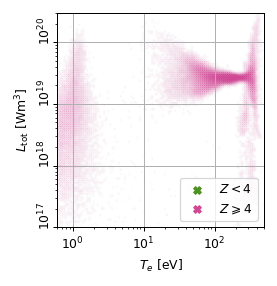

In [11]:
print("gogo")
xlims, ylims = (0.6, 5e2), (1e17, 0.3e+21)
norm = colors.PowerNorm(gamma=1, vmin=0, vmax=1) 
# colors.LogNorm(vmin=1e-3, vmax=1)# colors.SymLogNorm(vmin=0, vmax=1, linthresh=1e-3)
linecm = mpl.cm.turbo
fig, ax = plt.subplots(figsize=(3.1,3.2))
axs=[ax]

for i, cpath in enumerate([all_paths[0]]):
    frad = float(cpath.stem[20:24])/float(cpath.stem[9:13])
    diffval = float(2 if cpath.stem[-1]=="C" else cpath.stem[-2:])/10
    pathlabel="$f_{\mathrm{rad}} =$" + str(frad) + ", $D=$" + str(diffval)

    # plot emc3 data
    ds = xr.open_dataset(cpath)
    ds_ne = ds.ne.data.flatten()
    # scale py fraction made by >4
    ez_filter_low = (ds.Ez[:4].sum(dim="Ionization") > 0.5 * ds.Ez.sum(dim="Ionization")).data.flatten()
    ez_filter_high = (ds.Ez[4:].sum(dim="Ionization")> 0.5 * ds.Ez.sum(dim="Ionization")).data.flatten()
    ds_te = ds.Te.data.flatten()
    xy_edges = [np.logspace(*np.log10(xlims), 100), np.logspace(*np.log10(ylims), 100)]
    xy_grid = np.array(np.meshgrid(*xy_edges, indexing="ij"))
    mid_xy_grid = (xy_grid[:,1:,1:] + xy_grid[:,:-1,1:] + xy_grid[:,:-1,:-1] + xy_grid[:,1:,:-1])/4

#     z_values, _, _ = np.histogram2d(x=ds_te[ez_filter_low], y=ds_ne[ez_filter_low], bins=xy_edges)
#     normalized_z_values = z_values/z_values.max() + 1e-100
#     axs[i].pcolormesh(*mid_xy_grid, normalized_z_values, norm=norm, cmap=truncate_colormap(cm.PiYG, 0.9, 0.9),
#                       shading="gouraud", alpha=normalized_z_values**(1/2), zorder=1.5)
    
    z_values, _, _ = np.histogram2d(x=ds_te[ez_filter_high], y=ds_ne[ez_filter_high], bins=xy_edges)
    normalized_z_values = z_values/z_values.max() + 1e-100
    axs[i].pcolormesh(*mid_xy_grid, normalized_z_values, norm=norm, cmap=truncate_colormap(cm.PiYG, 0.15, 0.15),
                      shading="gouraud", alpha=normalized_z_values**(1/2), zorder=1.5)
    
    
    # labels
    axs[i].set_xlabel("$T_e$ [eV]")
    axs[i].set_yscale("log"); axs[i].set_xscale("log")
    axs[i].set_xlim(xlims); axs[i].set_ylim(ylims)
    bbox_props = dict(boxstyle="round", fc="w", ec="0.9", alpha=0.9)
    # axs[i].text(4e2, 0.6e-30, pathlabel, ha="right", va="top", bbox=bbox_props)
    if i==0:
        axs[i].set_ylabel("$L_{\mathrm{tot}}$ [Wm$^3$]")
    else:
        axs[i].axes.yaxis.set_ticklabels([]) 
    #axs[i].legend().set_zorder(1000)

ax.scatter([0],[1], color=cm.PiYG(0.9), marker="X", label="$Z<4$")
ax.scatter([0],[1], color=cm.PiYG(0.15), marker="X", label="$Z\:\geqslant\:4$")
ax.legend(loc=4)
ax.grid()

axs[0].tick_params(axis='y', labelrotation = 90)
dx = 4/72 #to adjust if necessary
dy = 15/72 #to adjust if necessary
offset = mpl.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
# apply offset transform to all y ticklabels (minor and major)
for label in axs[0].yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
fig.tight_layout()
fig.subplots_adjust(wspace=0.05, hspace=0)
# fig.savefig("./plots/lzCRMcurve-Ionization.png", dpi=300, pad_inches=-0.4)
# fig.savefig("./plots/lzCRMcurve-Ionization.pdf", pad_inches=-0.4)

gogo


<IPython.core.display.Javascript object>


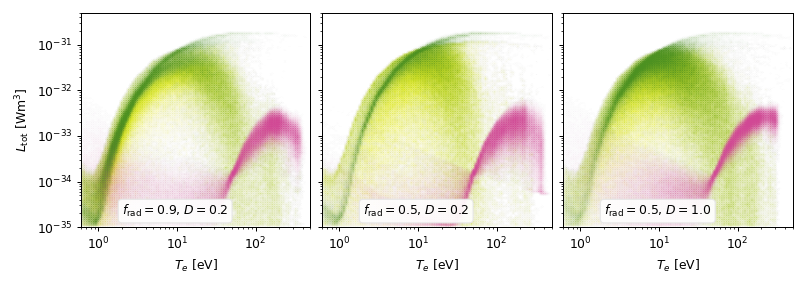

In [456]:
print("gogo")
xlims, ylims = (0.6, 5e2), (1e-35, 5e-31)
norm = colors.PowerNorm(gamma=1, vmin=0, vmax=1) 
# colors.LogNorm(vmin=1e-3, vmax=1)# colors.SymLogNorm(vmin=0, vmax=1, linthresh=1e-3)
linecm = mpl.cm.turbo
fig, axs = plt.subplots(figsize=(9,3.2), ncols=3)

for i, cpath in enumerate([all_paths[0], all_paths[4], all_paths[-1]]):
    frad = float(cpath.stem[20:24])/float(cpath.stem[9:13])
    diffval = float(2 if cpath.stem[-1]=="C" else cpath.stem[-2:])/10
    pathlabel="$f_{\mathrm{rad}} =$" + str(frad) + ", $D=$" + str(diffval)

    # plot emc3 data
    ds = xr.open_dataset(cpath)
    ds_lz = ds.Lz.data.flatten()
    # scale py fraction made by >4
    ez_rescale_low = (ds.Ez[:4].sum(dim="Ionization")/ds.Ez.sum(dim="Ionization")).data.flatten()
    ez_rescale_mid = (ds.Ez[3]/ds.Ez.sum(dim="Ionization")).data.flatten()
    ez_rescale_high = (ds.Ez[4:].sum(dim="Ionization")/ds.Ez.sum(dim="Ionization")).data.flatten()
    ds_te = ds.Te.data.flatten()
    xy_edges = [np.logspace(*np.log10(xlims), 100), np.logspace(*np.log10(ylims), 100)]
    xy_grid = np.array(np.meshgrid(*xy_edges, indexing="ij"))
    mid_xy_grid = (xy_grid[:,1:,1:] + xy_grid[:,:-1,1:] + xy_grid[:,:-1,:-1] + xy_grid[:,1:,:-1])/4
    
    z_values, _, _ = np.histogram2d(x=ds_te, y=ez_rescale_mid*ds_lz, bins=xy_edges)
    normalized_z_values = z_values/z_values.max() + 1e-100
    axs[i].pcolormesh(*mid_xy_grid, normalized_z_values, norm=norm, cmap=truncate_colormap(cm.plasma, 0.99, 0.99),
                      shading="gouraud", alpha=normalized_z_values, zorder=1.5)

    z_values, _, _ = np.histogram2d(x=ds_te, y=ez_rescale_low*ds_lz, bins=xy_edges)
    normalized_z_values = z_values/z_values.max() + 1e-100
    axs[i].pcolormesh(*mid_xy_grid, normalized_z_values, norm=norm, cmap=truncate_colormap(cm.PiYG, 0.9, 0.9),
                      shading="gouraud", alpha=normalized_z_values, zorder=1.5)
 
    z_values, _, _ = np.histogram2d(x=ds_te, y=ez_rescale_high*ds_lz, bins=xy_edges)
    normalized_z_values = z_values/z_values.max() + 1e-100
    axs[i].pcolormesh(*mid_xy_grid, normalized_z_values, norm=norm, cmap=truncate_colormap(cm.PiYG, 0.15, 0.15),
                      shading="gouraud", alpha=normalized_z_values, zorder=1.5)
    
    
    # labels
    axs[i].set_xlabel("$T_e$ [eV]")
    axs[i].set_yscale("log"); axs[i].set_xscale("log")
    axs[i].set_xlim(xlims); axs[i].set_ylim(ylims)
    bbox_props = dict(boxstyle="round", fc="w", ec="0.9", alpha=0.9)
    axs[i].text(2, 1.5e-35, pathlabel, ha="left", va="bottom", bbox=bbox_props)
    if i==0:
        axs[i].set_ylabel("$L_{\mathrm{tot}}$ [Wm$^3$]")
    else:
        axs[i].axes.yaxis.set_ticklabels([]) 
    #axs[i].legend().set_zorder(1000)
    
    
fig.tight_layout()
fig.subplots_adjust(wspace=0.05, hspace=0)

gogo


<IPython.core.display.Javascript object>


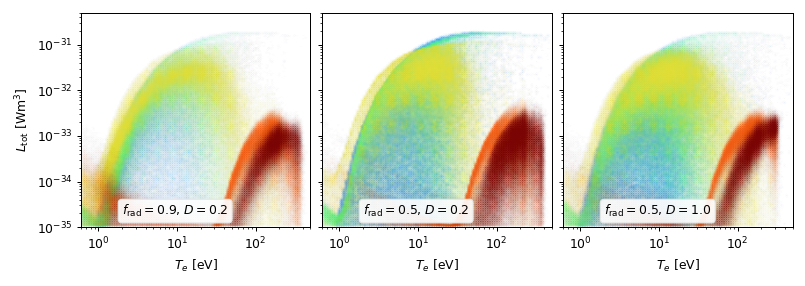

1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,

In [424]:
print("gogo")
xlims, ylims = (0.6, 5e2), (1e-35, 5e-31)
norm = colors.PowerNorm(gamma=1, vmin=0, vmax=1) 
# colors.LogNorm(vmin=1e-3, vmax=1)# colors.SymLogNorm(vmin=0, vmax=1, linthresh=1e-3)
linecm = mpl.cm.turbo
fig, axs = plt.subplots(figsize=(9,3.2), ncols=3)

for i, cpath in enumerate([all_paths[0], all_paths[4], all_paths[-1]]):
    frad = float(cpath.stem[20:24])/float(cpath.stem[9:13])
    diffval = float(2 if cpath.stem[-1]=="C" else cpath.stem[-2:])/10
    pathlabel="$f_{\mathrm{rad}} =$" + str(frad) + ", $D=$" + str(diffval)

    # plot emc3 data
    ds = xr.open_dataset(cpath)
    ds_lz = ds.Lz.data.flatten()
    ds_te = ds.Te.data.flatten()
    xy_edges = [np.logspace(*np.log10(xlims), 100), np.logspace(*np.log10(ylims), 100)]
    xy_grid = np.array(np.meshgrid(*xy_edges, indexing="ij"))
    mid_xy_grid = (xy_grid[:,1:,1:] + xy_grid[:,:-1,1:] + xy_grid[:,:-1,:-1] + xy_grid[:,1:,:-1])/4
    
    for j in range(1,6):
        print(j, end=",")
        ez_rescale = (ds.Ez[j]/ds.Ez.sum(dim="Ionization")).data.flatten()
        z_values, _, _ = np.histogram2d(x=ds_te, y=ez_rescale*ds_lz, bins=xy_edges)
        normalized_z_values = z_values/z_values.max() + 1e-100
        axs[i].pcolormesh(*mid_xy_grid, normalized_z_values, norm=norm, cmap=truncate_colormap(cm.turbo, j/5, j/5),
                          shading="gouraud", alpha=np.nan_to_num(normalized_z_values), zorder=1.5)
    
    
    # labels
    axs[i].set_xlabel("$T_e$ [eV]")
    axs[i].set_yscale("log"); axs[i].set_xscale("log")
    axs[i].set_xlim(xlims); axs[i].set_ylim(ylims)
    bbox_props = dict(boxstyle="round", fc="w", ec="0.9", alpha=0.9)
    axs[i].text(2, 1.5e-35, pathlabel, ha="left", va="bottom", bbox=bbox_props)
    if i==0:
        axs[i].set_ylabel("$L_{\mathrm{tot}}$ [Wm$^3$]")
    else:
        axs[i].axes.yaxis.set_ticklabels([]) 
    #axs[i].legend().set_zorder(1000)
    
    
fig.tight_layout()
fig.subplots_adjust(wspace=0.05, hspace=0)

# neutrals

<IPython.core.display.Javascript object>


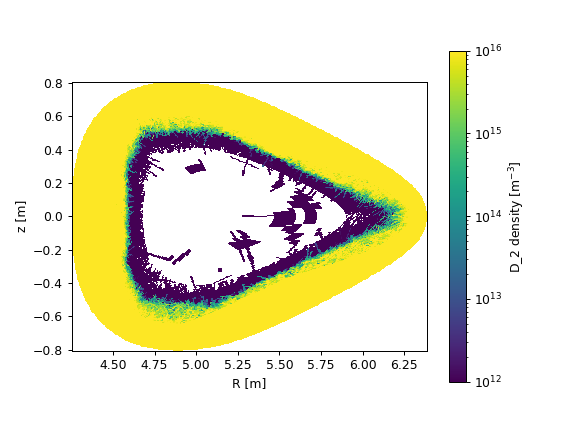

In [307]:
plt.close("all")
ds.emc3.plot_rz("nH2", 36*np.pi/180, norm=colors.LogNorm(vmin=1e12, vmax=1e16))
plt.show()

In [ ]:
ds = xr.open_dataset(all_paths[0])
plt.close("all")
plt.scatter(ds.
    s=10, marker="+", lw=0.5, c="k", alpha=0.1)

gogo


<IPython.core.display.Javascript object>


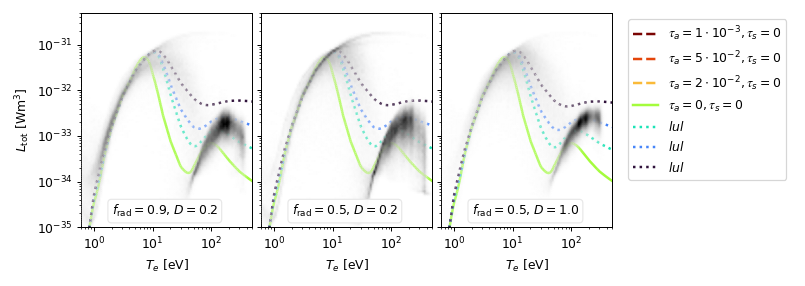

<xarray.DataArray 'ne' ()>
array(2.05136536e+19) <xarray.DataArray 'ne' ()>
array(2.2465e+19)
<xarray.DataArray 'ne' ()>
array(2.0570042e+19) <xarray.DataArray 'ne' ()>
array(2.4242e+19)
<xarray.DataArray 'ne' ()>
array(2.23113591e+19) <xarray.DataArray 'ne' ()>
array(2.6916e+19)


In [361]:
print("gogo")
xlims, ylims = (0.6, 5e2), (1e-35, 5e-31)
norm = colors.PowerNorm(gamma=1, vmin=0, vmax=1) 
# colors.LogNorm(vmin=1e-3, vmax=1)# colors.SymLogNorm(vmin=0, vmax=1, linthresh=1e-3)
cmap = trunc_binary
linecm = mpl.cm.turbo
fig, axs = plt.subplots(figsize=(9,3.2), ncols=4)

for i, cpath in enumerate([all_paths[0], all_paths[4], all_paths[-1]]):
    frad = float(cpath.stem[20:24])/float(cpath.stem[9:13])
    diffval = float(2 if cpath.stem[-1]=="C" else cpath.stem[-2:])/10
    pathlabel="$f_{\mathrm{rad}} =$" + str(frad) + ", $D=$" + str(diffval)

    # plot emc3 data
    ds = xr.open_dataset(cpath)
    ds_lz = ds.Lz.data.flatten()
    ds_te = ds.Te.data.flatten()
    xy_edges = [np.logspace(*np.log10(xlims), 100), np.logspace(*np.log10(ylims), 100)]
    xy_grid = np.array(np.meshgrid(*xy_edges, indexing="ij"))
    mid_xy_grid = (xy_grid[:,1:,1:] + xy_grid[:,:-1,1:] + xy_grid[:,:-1,:-1] + xy_grid[:,1:,:-1])/4

    z_values, _, _ = np.histogram2d(x=ds_te, y=ds_lz, bins=xy_edges)
    normalized_z_values = z_values/z_values.max() + 1e-100
    axs[i].pcolormesh(*mid_xy_grid, normalized_z_values, norm=norm, cmap=cmap, shading="gouraud", alpha=1, zorder=1.5)
    axs[i].pcolormesh(*mid_xy_grid, normalized_z_values, norm=norm, cmap=cmap, shading="gouraud", alpha=normalized_z_values**(1/2)*0.8, zorder=3)
    
    
    # plot approximation
    mean_ne = float(ds.ne.mean().data[()]); print(ds.ne.mean(), ds.ne.median())
    te = np.logspace(np.log10(2.01e-1),np.log10(1.49e4),300)
    
    _, lztot1 = get_plot_lz(ne=mean_ne)
    axs[i].plot(te, lztot1, c=linecm(0.5), linestyle="-", zorder=2, lw=2)
    _, lztot1 = get_plot_lz(ne=mean_ne, n0=1e+21, taua=2e-2)
    axs[i].plot(te, lztot1, c=linecm(0.3333), linestyle=":", zorder=2, lw=2)
    _, lztot1 = get_plot_lz(ne=mean_ne, n0=1e+21, taua=5e-3)
    axs[i].plot(te, lztot1, c=linecm(0.1666), linestyle=":", zorder=2, lw=2)
    _, lztot1 = get_plot_lz(ne=mean_ne, n0=1e+21, taua=1e-3)
    axs[i].plot(te, lztot1, c=linecm(0.0), linestyle=":", zorder=2, lw=2)
    if i==0:
        axs[-1].plot(te, lztot1, c=linecm(0.9999), label="$𝜏_a=1\cdot 10^{-3}, 𝜏_s=0$", linestyle="--", zorder=2, lw=2)
        axs[-1].plot(te, lztot1, c=linecm(0.8333), label="$𝜏_a=5\cdot 10^{-2}, 𝜏_s=0$", linestyle="--", zorder=2, lw=2)
        axs[-1].plot(te, lztot1, c=linecm(0.6666), label="$𝜏_a=2\cdot 10^{-2}, 𝜏_s=0$", linestyle="--", zorder=2, lw=2)
        axs[-1].plot(te, lztot1, c=linecm(0.5), label="$𝜏_a=0, 𝜏_s=0$", linestyle="-", zorder=2, lw=2)
        axs[-1].plot(te, lztot1, c=linecm(0.3333), label="$lul$", linestyle=":", zorder=2, lw=2)
        axs[-1].plot(te, lztot1, c=linecm(0.1666), label="$lul$", linestyle=":", zorder=2, lw=2)
        axs[-1].plot(te, lztot1, c=linecm(0.0), label="$lul$", linestyle=":", zorder=2, lw=2)
    
    
    # labels
    axs[i].set_xlabel("$T_e$ [eV]")
    if i==0: axs[i].set_ylabel("$L_{\mathrm{tot}}$ [Wm$^3$]")
    axs[i].set_yscale("log"); axs[i].set_xscale("log")
    axs[i].set_xlim(xlims); axs[i].set_ylim(ylims)
    bbox_props = dict(boxstyle="round", fc="w", ec="0.9", alpha=0.9)
    axs[i].text(2, 1.5e-35, pathlabel, ha="left", va="bottom", bbox=bbox_props)
    #axs[i].legend().set_zorder(1000)
    
    
# last plot
for i in range(1,4):
    axs[i].axes.yaxis.set_ticklabels([])
axs[-1].axes.xaxis.set_ticklabels([])
axs[-1].set_xlim((0.5,1))
axs[-1].set_ylim((0.5,1))
axs[-1].axes.xaxis.set_visible(False)
axs[-1].axes.yaxis.set_visible(False)
axs[-1].axis('off')
axs[-1].legend()
    
fig.tight_layout()
fig.subplots_adjust(wspace=0.05, hspace=0)


# 3d plot

<IPython.core.display.Javascript object>


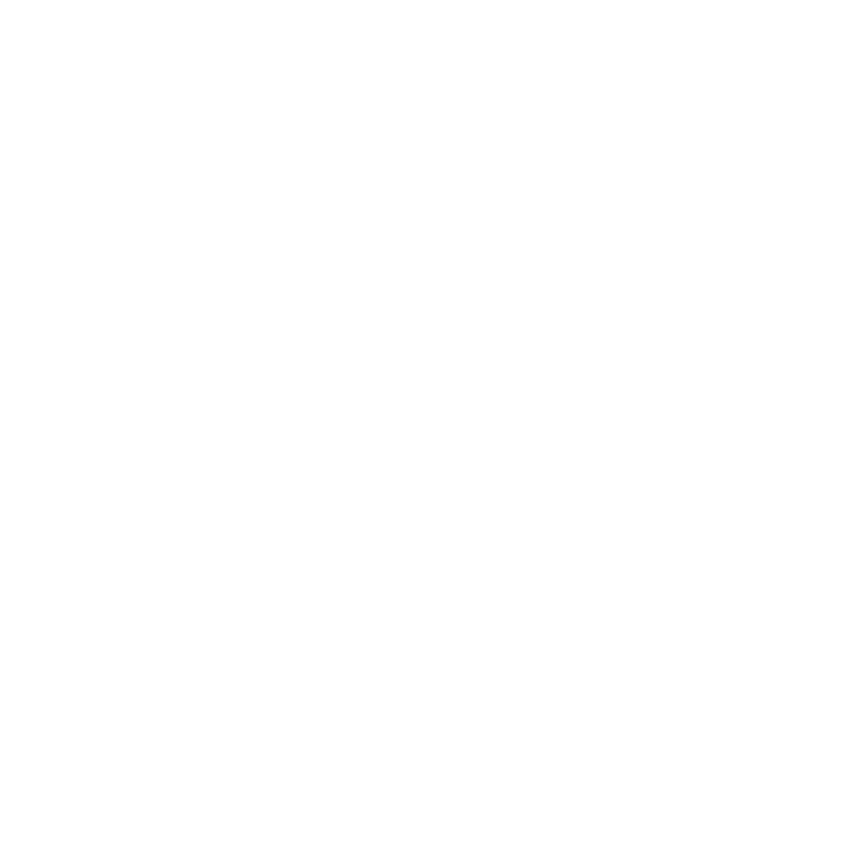

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


In [290]:
plt.close("all")
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(9.5,9.5))

ds = xr.open_dataset(all_paths[0])
step = 100
ds_lz_tot = ds.Lz.data.flatten()[::step]
ds_te = ds.Te.data.flatten()[::step]
ds_ne = ds.ne.data.flatten()[::step]


ax.scatter(np.log10(ds_te), np.log10(ds_ne), np.log10(ds_lz_tot))

ax.set_xlabel("log10( electron temperature / eV )")
ax.set_ylabel("log10( electron density * cm$^3$ )")
ax.set_zlabel("$L_Z$ / Wm$^3$")

ax.set_xlim(-0.5,2.5)
ax.set_ylim(14.5,20.5)
ax.set_zlim(-35,-31.5)

fig.tight_layout()

In [447]:
# testing

In [450]:
ds = xr.open_dataset(all_paths[0])
dste = ds.Te.mean(dim=("theta", "phi"))
dsr = ds.R_bounds[:, 512//2, 0, :, 0, 0].data.mean(axis=1)

<IPython.core.display.Javascript object>


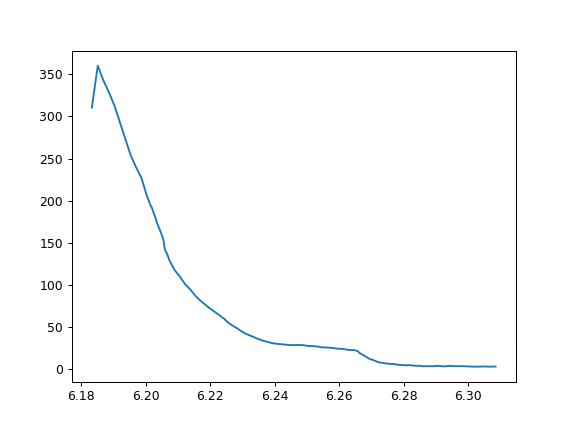

In [451]:
plt.close("all")
plt.plot(dsr, dste)